  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.0/318.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.7 MB/s eta 0:00:00
 

/usr/local/lib/python3.10/dist-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


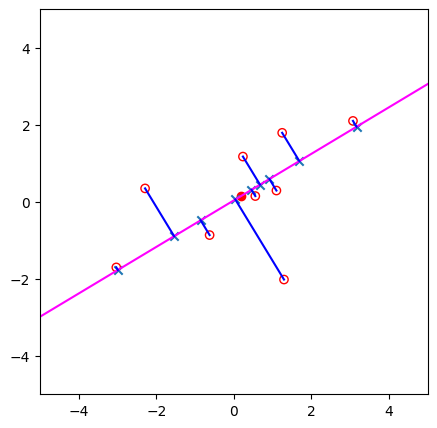

In [1]:

import numpy as np
import matplotlib.pyplot as plt
try:
    from sklearn.decomposition import PCA
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn.decomposition import PCA
import os
try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

np.random.seed(42)

# Generate Data
n = 9
var = 3
corr = .5

cov_mat = [[var, corr * var], [corr * var, var]]
X = np.random.multivariate_normal([0, 0], cov_mat, n)

# Project Data onto PCA line
subspace_dim = 1
pca = PCA(subspace_dim)
X_reconstr = pca.inverse_transform(pca.fit_transform(X))

# Create figure and save.
fig, ax = plt.subplots(figsize=(5, 5))

# Plot raw data
ax.scatter(X[:, 0], X[:, 1], marker='o', facecolor='none', edgecolor='red')
X_mean = np.mean(X, axis=0)
ax.scatter(X_mean[0], X_mean[1], facecolor='red')

# Plot PCA line
low_point = X_mean - 10 * pca.components_.reshape(-1)
high_point = X_mean + 10 * pca.components_.reshape(-1)
ax.plot([low_point[0], high_point[0]], [low_point[1], high_point[1]], color='magenta')
ax.set_ylim(-5, 5)
ax.set_xlim(-5, 5)

# Plot projected points
ax.scatter(X_reconstr[:, 0], X_reconstr[:, 1], marker='x')

# Plot projection lines
for (xi1, xi2), (xi1_rec, xi2_rec) in zip(X, X_reconstr):
    ax.plot([xi1, xi1_rec], [xi2, xi2_rec], color='blue')


pml.savefig("pcaDemo2dProjection.pdf")

plt.show()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Performing PCA


/usr/local/lib/python3.10/dist-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


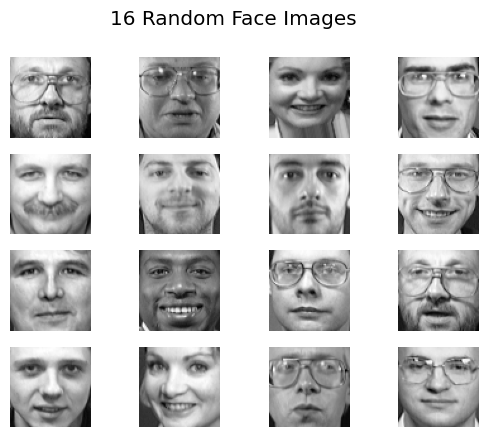

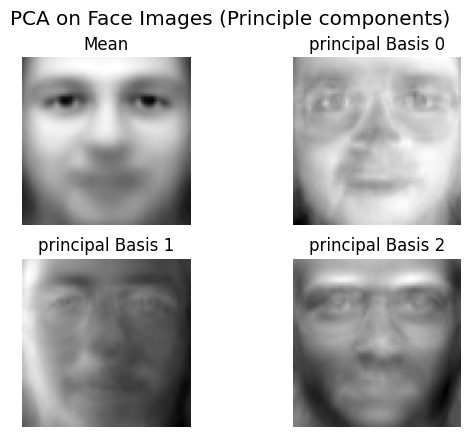

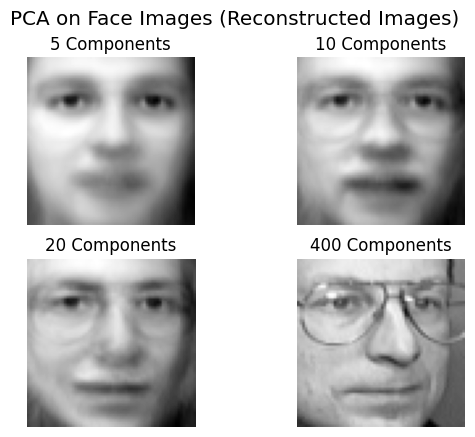

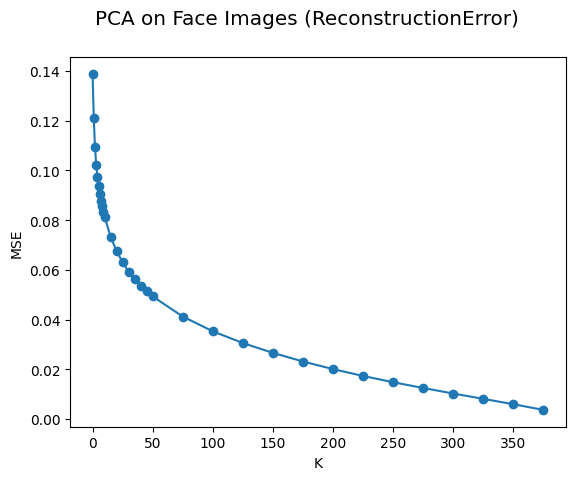

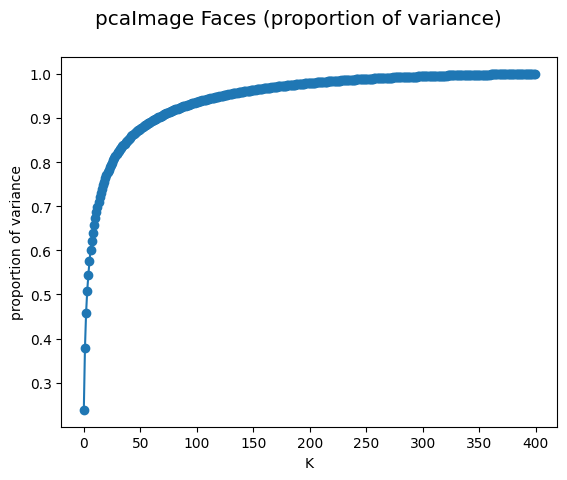

In [2]:

from numpy.linalg import matrix_rank
from matplotlib import pyplot as plt
try:
    from sklearn.datasets import fetch_olivetti_faces
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from sklearn.decomposition import PCA

try:
    from probml_utils import savefig
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig


np.random.seed(0)
# load the faces (value from 0 to 1)
faces = fetch_olivetti_faces()
img = faces['images']
X = faces['data']
target = faces['target']
y = np.ravel(np.repeat(np.arange(1, 41), 10))

h, w, n = 64, 64, len(img)

val = np.random.choice(n, 16, replace=False)
fig, axs = plt.subplots(4, 4)
fig.suptitle("16 Random Face Images ", fontsize="x-large")
for i in range(16):
    r, c = int(i / 4), i % 4
    axs[r, c].imshow(X[val[i]].reshape(h, w), cmap='gray')
    axs[r, c].axis('off')

savefig("/PcaTrainFaceImages.png")

print('Performing PCA')
mu = np.mean(X, axis=0)
XC = X - mu
pca = PCA()
pca.fit(XC)
V = pca.components_
Z = np.dot(XC, V.T)

fig, axs = plt.subplots(2, 2)
fig.suptitle("PCA on Face Images (Principle components) ", fontsize="x-large")
for i in range(4):
    r, c = int(i / 2), i % 2
    if r == 0 and c == 0:
        # mu plot
        axs[r, c].imshow(mu.reshape(h, w), cmap='gray')
        axs[r, c].axis('off')
        axs[r, c].set_title('Mean')
    else:
        # plots the first three Eigenfaces
        axs[r, c].imshow(V[i - 1].reshape(h, w), cmap='gray')
        axs[r, c].axis('off')
        axs[r, c].set_title('principal Basis {}'.format(i - 1))
savefig("PrincipalComponentFaceImages.png")

ndx = 125
Ks = [4, 20, 120, matrix_rank(X)]
fig, axs = plt.subplots(2, 2)
fig.suptitle("PCA on Face Images (Reconstructed Images) ", fontsize="x-large")
count = 0
for k in Ks:
    Xrecon = np.dot(Z[np.newaxis, ndx, :k], V[:k, :]) + mu
    r, c = int(count / 2), count % 2
    axs[r, c].imshow(Xrecon.reshape(64, 64), cmap='gray')
    axs[r, c].axis('off')
    axs[r, c].set_title('{} Components'.format(k))
    count += 1
savefig("PCAReconstructedFaceImages.png")


fig, axs = plt.subplots(1, 1)
fig.suptitle("PCA on Face Images (ReconstructionError) ", fontsize="x-large")
Ks = []
Ks.extend(list(np.arange(0, 10, 1)))
Ks.extend(list(np.arange(10, 50, 5)))
Ks.extend(list(np.arange(50, matrix_rank(X), 25)))
mse = np.zeros(len(Ks))
count = 0
for k in Ks:
    Xrecon = np.dot(Z[:, :k], V[:k, :]) + mu
    err = (Xrecon - X)
    mse[count] = np.sqrt(np.mean(err ** 2))
    count += 1

axs.plot(Ks, mse, '-o')
axs.set_ylabel('MSE')
axs.set_xlabel('K')
savefig("ReconstructionError.png")

fig, axs = plt.subplots(1, 1)
fig.suptitle("pcaImage Faces (proportion of variance) ", fontsize="x-large")

axs.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_), 'o-')
axs.set_ylabel('proportion of variance')
axs.set_xlabel('K')
savefig("PCAvariance.png")
